#  Medical Expenses Prediction Analysis

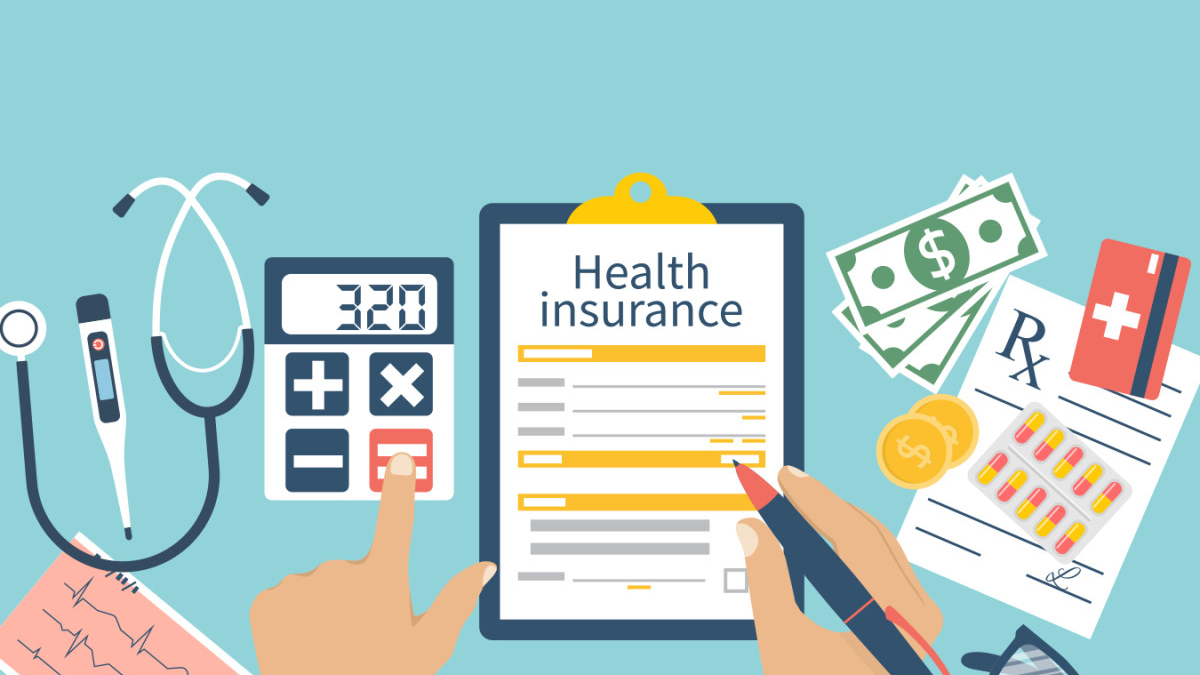

In [152]:
from IPython.display import Image
Image("image.png")

## importing all the required libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import norm, boxcox
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [141]:
data = pd.read_csv('med-insurance.csv')
data.shape

(1338, 7)

In [82]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [83]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


## Variable Description

__age__ : age of primary beneficiary

__sex__ : insurance contractor gender, female, male

__bmi__ : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

__children__ : Number of children covered by health insurance / Number of dependents

__smoker__ : Smoking

__region__ : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

__charges__ : Individual medical costs billed by health insurance

In [14]:
print("Data Info")
data.info()

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


__float64__ : bmi, charges

__int64__ : age, children

__object__ : sex, smoker, region

## Basic Data Analysis

### sex - expenses

In [16]:
data[["sex","expenses"]].groupby(["sex"], as_index = False).mean().sort_values(by = "expenses",ascending = False).style.background_gradient("Greens")

,sex,expenses
1,male,13956.751420
0,female,12569.578897


__men pay more than women.__ but not much difference

### children - expenses

In [21]:
data[["children","expenses"]].groupby(["children"], as_index = False).mean().sort_values(by = "expenses",ascending = False).style.background_gradient("Greens")

,children,expenses
3,3,15355.318535
2,2,15073.564000
4,4,13850.656800
1,1,12731.171821
0,0,12365.975767
5,5,8786.035556


__the effect of the number of children on the wages paid.___

### smoker - expenses

In [25]:
data[["smoker","expenses"]].groupby(["smoker"], as_index = False).mean().sort_values(by = "expenses",ascending = False).style.background_gradient("Greens")

,smoker,expenses
1,yes,32050.231971
0,no,8434.268449


__smokers pay more than non-smokers__

### region - expenses

In [27]:
data[["region","expenses"]].groupby(["region"], as_index = False).mean().sort_values(by = "expenses",ascending = False).style.background_gradient("Greens")

,region,expenses
2,southeast,14735.411538
0,northeast,13406.384691
1,northwest,12417.575169
3,southwest,12346.937908


#### southeast pay more than other regions

### region - other features

In [29]:
region = data.groupby("region", as_index=False)["age","bmi","children","expenses"].mean().sort_values("age",ascending=False).style.background_gradient("Blues")
print("Average value of other properties by region \n")
region

Average value of other properties by region 



,region,age,bmi,children,expenses
3,southwest,39.455385,30.596615,1.141538,12346.937908
0,northeast,39.268519,29.176235,1.046296,13406.384691
1,northwest,39.196923,29.201846,1.147692,12417.575169
2,southeast,38.939560,33.359341,1.049451,14735.411538


### sex - other features

In [30]:
sex = data.groupby("sex", as_index=False)["age","bmi","children","expenses"].mean().sort_values("age",ascending=False).style.background_gradient("Blues")
print("Average value of other properties by sex \n")
sex

Average value of other properties by sex 



,sex,age,bmi,children,expenses
0,female,39.503021,30.379758,1.074018,12569.578897
1,male,38.917160,30.945266,1.115385,13956.751420


### smoker - other features

In [31]:
smoker = data.groupby("smoker", as_index=False)["age","bmi","children","expenses"].mean().sort_values("age",ascending=False).style.background_gradient("Blues")
print("Average value of other properties by smoker \n")
smoker

Average value of other properties by smoker 



,smoker,age,bmi,children,expenses
0,no,39.385338,30.653195,1.090226,8434.268449
1,yes,38.514599,30.713139,1.113139,32050.231971


### children - other features

In [32]:
children = data.groupby("children", as_index=False)["age","bmi","expenses"].mean().sort_values("age",ascending=False).style.background_gradient("Blues")
print("Average value of other properties by children \n")
children

Average value of other properties by children 



,children,age,bmi,expenses
3,3,41.566879,30.688535,15355.318535
1,1,39.453704,30.623765,12731.171821
2,2,39.445833,30.979167,15073.564000
4,4,39.000000,31.388000,13850.656800
0,0,38.444251,30.553484,12365.975767
5,5,35.611111,29.600000,8786.035556


In [33]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

#### there is no missing data in the data.

### Univariate - Visualization

### Age

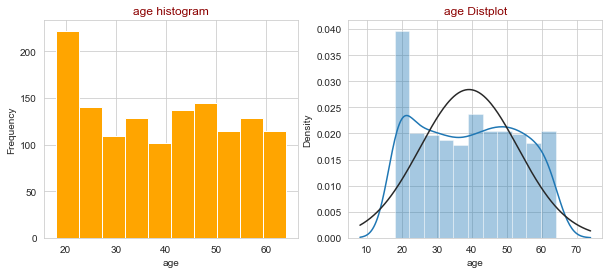

In [40]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(data["age"], color="orange")
plt.xlabel("age")
plt.ylabel("Frequency")
plt.title("age histogram", color = "darkred")
plt.subplot(1,2,2)
sns.distplot(data["age"], fit=norm)
plt.title("age Distplot", color = "darkred")

plt.show()

the distribution of age characteristics according to the normal distribution. In fact, there does not seem to be a big difference with the normal distribution, but it can still be corrected.

### Sex

male      676
female    662
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='count'>

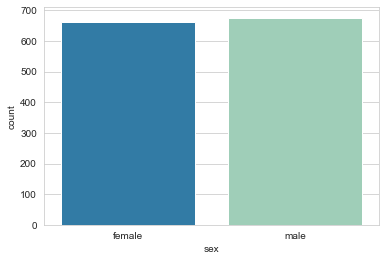

In [38]:
print(data['sex'].value_counts())

sns.set_style('whitegrid')
sns.countplot(x='sex',data=data, palette='YlGnBu_r')

## Pie chart

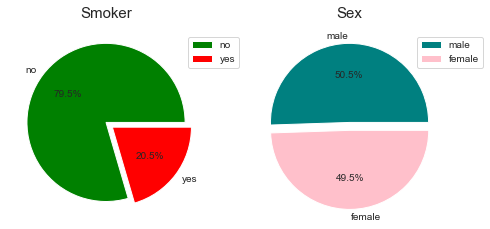

In [142]:
# Smoker
plt.figure(figsize = (8,8))
plt.subplot(2,2,1)
labels = data['smoker'].value_counts().index
colors = ['green','red']
explode = [0,.1]
sizes = data['smoker'].value_counts().values
plt.pie(sizes, explode=explode, shadow=False,labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Smoker',fontsize = 15)
plt.legend(labels,bbox_to_anchor=(0.8, -0.04, 0.4, 1))

# Sex
plt.subplot(2,2,2)
label = data.sex.value_counts().index
size = data.sex.value_counts().values
color = ['teal','pink']
plt.pie(size, explode=explode, shadow=False,labels=label, colors=color, autopct='%1.1f%%')
plt.title('Sex',fontsize = 15)
plt.legend(label,bbox_to_anchor=(0.8, -0.04, 0.4, 1))
plt.show()

#### male and female count almost equal

### Bmi

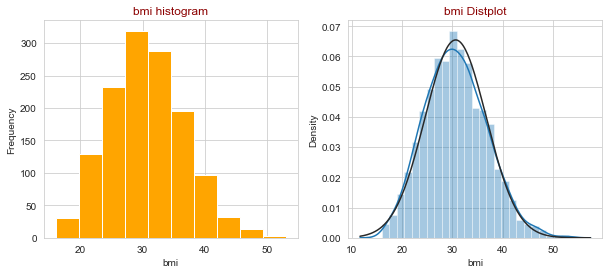

In [39]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(data["bmi"], color="orange")
plt.xlabel("bmi")
plt.ylabel("Frequency")
plt.title("bmi histogram", color = "darkred")
plt.subplot(1,2,2)
sns.distplot(data["bmi"], fit=norm)
plt.title("bmi Distplot", color = "darkred")

plt.show()

#### the same as the normal distribution

### children

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


<AxesSubplot:xlabel='children', ylabel='count'>

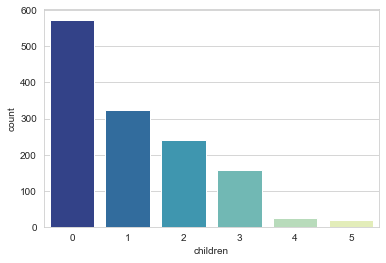

In [41]:
print(data['children'].value_counts())

sns.set_style('whitegrid')
sns.countplot(x='children',data=data, palette='YlGnBu_r')

### smoker

no     1064
yes     274
Name: smoker, dtype: int64


<AxesSubplot:xlabel='smoker', ylabel='count'>

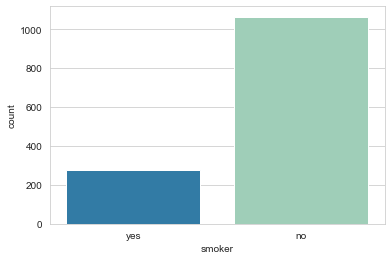

In [42]:
print(data['smoker'].value_counts())

sns.set_style('whitegrid')
sns.countplot(x='smoker',data=data, palette='YlGnBu_r')

#### non-smokers are more number then smokers

### region

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


<AxesSubplot:xlabel='region', ylabel='count'>

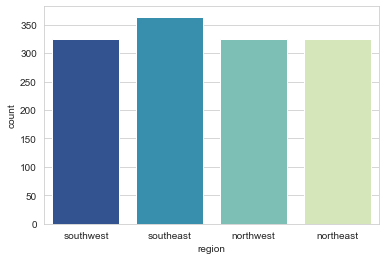

In [43]:
print(data['region'].value_counts())

sns.set_style('whitegrid')
sns.countplot(x='region',data=data, palette='YlGnBu_r')

#### all region values are most equal

### expenses

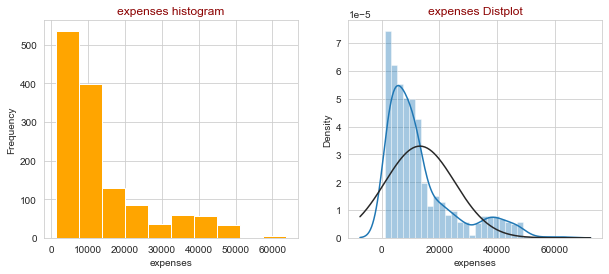

In [45]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(data["expenses"], color="orange")
plt.xlabel("expenses")
plt.ylabel("Frequency")
plt.title("expenses histogram", color = "darkred")
plt.subplot(1,2,2)
sns.distplot(data["expenses"], fit=norm)
plt.title("expenses Distplot", color = "darkred")

plt.show()

#### expenses displot show that it is positive skewness

### Bivariate Visualization

### Age- sex and Age- Region

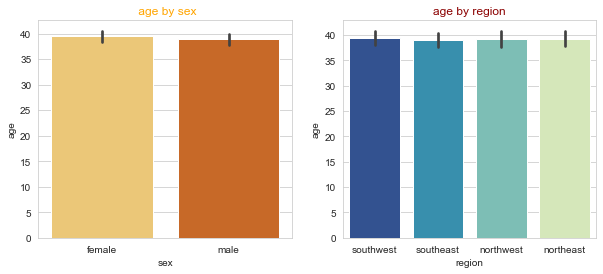

In [60]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x = data.sex, y =data.age , palette="YlOrBr")
plt.xlabel("sex")
plt.ylabel("age")
plt.title(" age by sex", color = "orange")
plt.subplot(1,2,2)
sns.barplot(x = data.region, y =data.age , palette="YlGnBu_r")
plt.title("age by region", color = "darkred")

plt.show()

### Age- smoker and Age-children

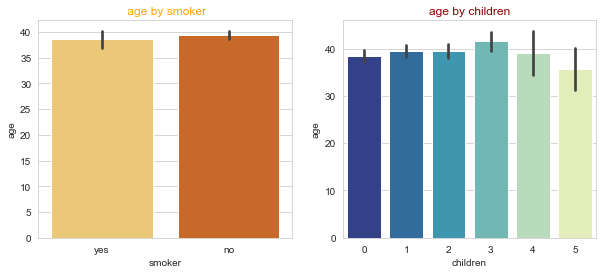

In [61]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x = data.smoker, y =data.age , palette="YlOrBr")
plt.xlabel("smoker")
plt.ylabel("age")
plt.title(" age by smoker", color = "orange")
plt.subplot(1,2,2)
sns.barplot(x = data.children, y =data.age , palette="YlGnBu_r")
plt.title("age by children", color = "darkred")

plt.show()

## BMI-sex and smoker-sex

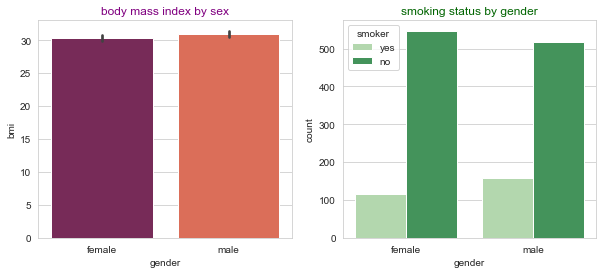

In [73]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x = data.sex, y = data.bmi, palette= "rocket")
plt.title("body mass index by sex", color = "purple")
plt.xlabel("gender")
plt.ylabel("bmi")
plt.subplot(1,2,2)
sns.countplot(x = data.sex, hue = data.smoker, data = data, palette="Greens")
plt.title("smoking status by gender", color = "darkgreen")
plt.xlabel("gender")
plt.show()

- In the first graph we are looking at the effect of gender on bmi. There doesn't seem to be much difference.
- In second plot examined the smoking status by gender. they look close to each other as men and women.

### sex- expenses number and region - expenses

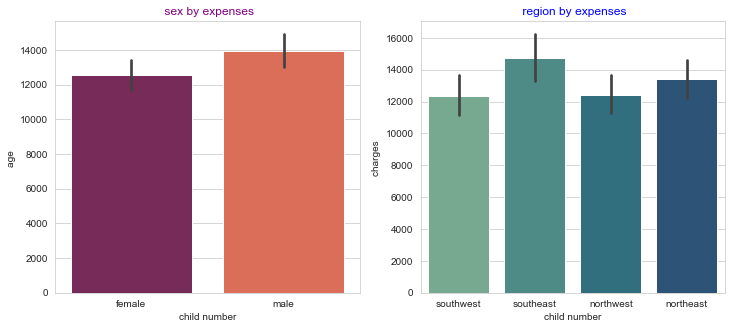

In [78]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x = data.sex, y = data.expenses, palette= "rocket")
plt.title(" sex by expenses", color = "purple")
plt.xlabel("child number")
plt.ylabel("age ")
plt.subplot(1,2,2)
sns.barplot(x = data.region, y = data.expenses, palette="crest")
plt.title(" region by expenses", color = "blue")
plt.xlabel("child number")
plt.ylabel("charges ")

plt.show()

- in the second graph Southeast also we see that the wage paid is higher than the others.

### Boxplot between sex and expenses

In [149]:
px.box(data, x ='sex',y = 'expenses', points="all")

### Boxplot between children and expenses

In [150]:
px.box(data, x ='children',y = 'expenses', points="all")

### Boxplot between smoker and expenses

In [147]:
px.box(data, x ='smoker',y = 'expenses', points="all")

### scatterplot between bmi and expenses

In [148]:
px.scatter(data, y = 'expenses',
           x = 'bmi')

### Heatmap

<AxesSubplot:>

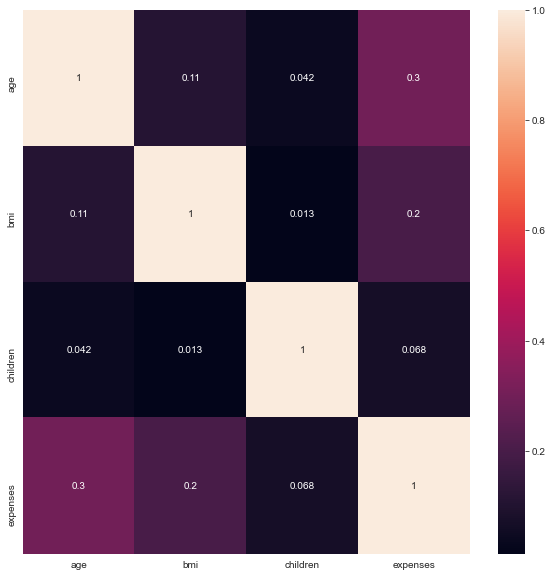

In [145]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot=True)

## Feature Engineering

### Sex

In [84]:
data = pd.get_dummies(data, columns= ["sex"])
data.head()

,age,bmi,children,smoker,region,expenses,sex_female,sex_male
0,19,27.9,0,yes,southwest,16884.92,1,0
1,18,33.8,1,no,southeast,1725.55,0,1
2,28,33.0,3,no,southeast,4449.46,0,1
3,33,22.7,0,no,northwest,21984.47,0,1
4,32,28.9,0,no,northwest,3866.86,0,1


### children

In [85]:
data = pd.get_dummies(data, columns= ["children"])
data.head()

,age,bmi,smoker,region,expenses,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5
0,19,27.9,yes,southwest,16884.92,1,0,1,0,0,0,0,0
1,18,33.8,no,southeast,1725.55,0,1,0,1,0,0,0,0
2,28,33.0,no,southeast,4449.46,0,1,0,0,0,1,0,0
3,33,22.7,no,northwest,21984.47,0,1,1,0,0,0,0,0
4,32,28.9,no,northwest,3866.86,0,1,1,0,0,0,0,0


## smoker

In [86]:
data = pd.get_dummies(data, columns= ["smoker"])
data.head()

,age,bmi,region,expenses,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes
0,19,27.9,southwest,16884.92,1,0,1,0,0,0,0,0,0,1
1,18,33.8,southeast,1725.55,0,1,0,1,0,0,0,0,1,0
2,28,33.0,southeast,4449.46,0,1,0,0,0,1,0,0,1,0
3,33,22.7,northwest,21984.47,0,1,1,0,0,0,0,0,1,0
4,32,28.9,northwest,3866.86,0,1,1,0,0,0,0,0,1,0


### region

In [87]:
data = pd.get_dummies(data, columns= ["region"])
data.head()

,age,bmi,expenses,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,16884.92,1,0,1,0,0,0,0,0,0,1,0,0,0,1
1,18,33.8,1725.55,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,28,33.0,4449.46,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,33,22.7,21984.47,0,1,1,0,0,0,0,0,1,0,0,1,0,0
4,32,28.9,3866.86,0,1,1,0,0,0,0,0,1,0,0,1,0,0


## charges

##### we noticed that there was skewness. We took notes to fix this.

In [89]:
data["expenses"] = np.log1p(data["expenses"])

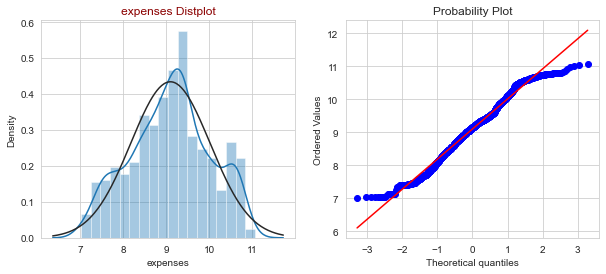

In [90]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["expenses"], fit=norm)
plt.title("expenses Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["expenses"], plot = plt)
plt.show()

### Splitting the Data into Training and Testing Sets

In [91]:
# Separating target variable and its features
y = data.expenses
X = data.drop(["expenses"], axis = 1)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [95]:
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (1003, 16)
x test:  (335, 16)
y train:  (1003,)
y test:  (335,)


### Build the Model

### Applying regression models

In [96]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [116]:
CV = []
R2_train = []
R2_test = []
mae_train=[]
mse_train=[]
mae_test=[]
mse_test=[]

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # Mean Squared error  of train set
    mse_train_model = mean_squared_error(y_train,y_pred_train)
    mse_train.append(round(mse_train_model,2))
    
    # Mean absolute error of train set
    mae_train_model = mean_absolute_error(y_train,y_pred_train)
    mae_train.append(round(mae_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # Mean Squared error of test set
    mse_test_model = mean_squared_error(y_test,y_pred_test)
    mse_test.append(round(mse_test_model,2))
    
    # Mean absolute error of train set
    mae_test_model = mean_absolute_error(y_test,y_pred_test)
    mae_test.append(round(mae_test_model,2))
    
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train Mean absolute error :",round(mae_train_model,2))
    print("Test Mean absolute error :",round(mae_test_model,2))
    print("Train Mean Squared error :",round(mse_train_model,2))
    print("Test Mean Squared error :",round(mse_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

### Standard Linear Regression

Train R2-score : 0.77
Test R2-score : 0.78
Train Mean absolute error : 0.28
Test Mean absolute error : 0.28
Train Mean Squared error : 0.2
Test Mean Squared error : 0.19
Train CV scores : [0.76999372 0.81081126 0.71181413 0.7143239  0.77781232]
Train CV mean : 0.76


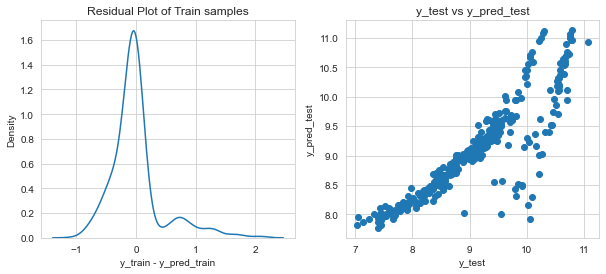

In [117]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

### Ridge

Train R2-score : 0.77
Test R2-score : 0.78
Train Mean absolute error : 0.28
Test Mean absolute error : 0.28
Train Mean Squared error : 0.2
Test Mean Squared error : 0.19
Train CV scores : [0.77022228 0.81181995 0.71393011 0.71817382 0.77697208]
Train CV mean : 0.76


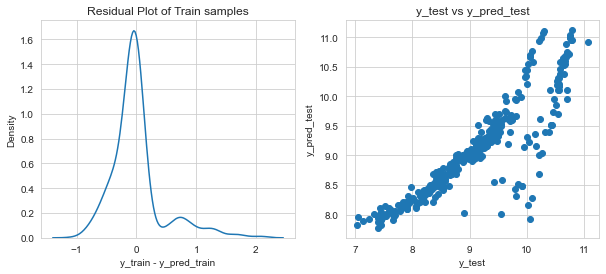

In [118]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

### Lasso

Train R2-score : 0.77
Test R2-score : 0.78
Train Mean absolute error : 0.28
Test Mean absolute error : 0.28
Train Mean Squared error : 0.2
Test Mean Squared error : 0.19
Train CV scores : [0.77015207 0.81162311 0.71300113 0.71697813 0.77710847]
Train CV mean : 0.76


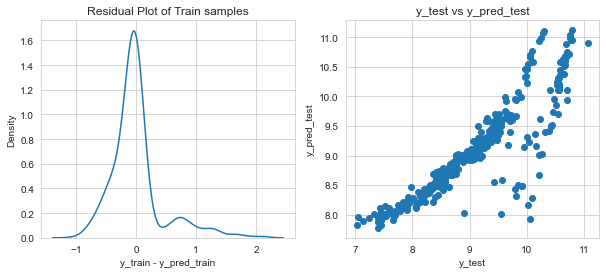

In [119]:
from sklearn.linear_model import Lasso
ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
car_pred_model(ls_rs,"lasso.pkl")

### RandomForestRegressor

Train R2-score : 0.84
Test R2-score : 0.82
Train Mean absolute error : 0.2
Test Mean absolute error : 0.22
Train Mean Squared error : 0.13
Test Mean Squared error : 0.16
Train CV scores : [0.83318835 0.89302053 0.78272127 0.81028749 0.82270599]
Train CV mean : 0.83


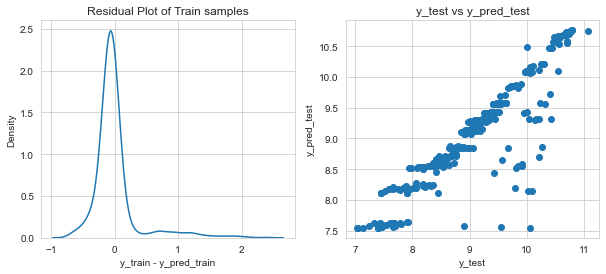

In [120]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
car_pred_model(rf_rs,'random_forest.pkl')

### GradientBoostingRegressor

Train R2-score : 0.93
Test R2-score : 0.82
Train Mean absolute error : 0.13
Test Mean absolute error : 0.2
Train Mean Squared error : 0.06
Test Mean Squared error : 0.15
Train CV scores : [0.85274259 0.89566856 0.78314593 0.81652082 0.80572111]
Train CV mean : 0.83


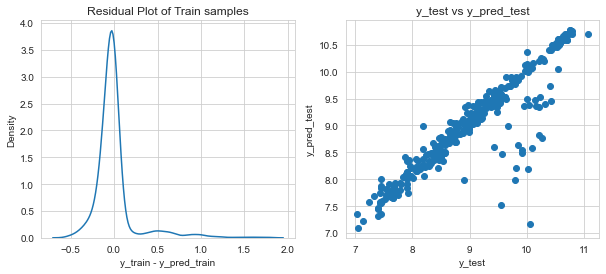

In [121]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)
car_pred_model(gb_rs,"gradient_boosting.pkl")

## Model Results

In [122]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV,
                     "mae_train":mae_train,"mse_train":mse_test,"mae_test":mae_test,"mse_test":mse_test})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train),mae_train,mse_train,mae_test,mse_test
0,LinearRegression,0.77,0.78,0.76,0.28,0.19,0.28,0.19
1,Ridge,0.77,0.78,0.76,0.28,0.19,0.28,0.19
2,Lasso,0.77,0.78,0.76,0.28,0.19,0.28,0.19
3,RandomForestRegressor,0.84,0.82,0.83,0.20,0.16,0.22,0.16
4,GradientBoostingRegressor,0.93,0.82,0.83,0.13,0.15,0.20,0.15


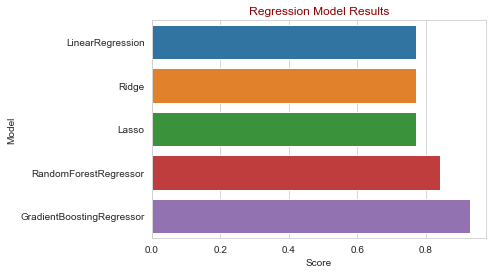

In [132]:
g = sns.barplot(y = results.Model, x =results["R Squared(Train)"])
g.set_xlabel("Score")
g.set_title("Regression Model Results", color = "darkred")
plt.show()

## From above 5 models given good results the best among them  Gradient Boosting Regression.